In [3]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
with open('dataDictionary.pkl', 'rb') as f:
    dataDictionary = pickle.load(f) 

In [6]:
dataDictionary

,name,description,units,valid values,var_type,min,max
0,all0000,Total number of trades including collections a...,Trades,0-90,numeric,0,90
1,all0060,Total number of trades excluding collections o...,Trades,0-90,numeric,0,90
2,all0061,Total number of trades excluding collections o...,Trades,0-90,numeric,0,90
3,all0101,Total number of Fannie Mae trades including in...,Trades,0-90,numeric,0,90
4,all0200,Total number of trades including collections,Trades,0-90,numeric,0,90
...,...,...,...,...,...,...,...
818,stu8142,Number of months to the nearest future payment...,Months,0-9990,numeric,0,9990
819,stu8151,Number of months since the most recent 30-180 ...,Months,0-9990,numeric,0,9990
820,stu8228,Number of months since the oldest non-deferred...,Months,0-9990,numeric,0,9990
821,use0300,Total number of authorized user trades,Trades,0-90,numeric,0,90


In [7]:
forStudents = pd.read_pickle('forStudents.pkl')

In [8]:
forStudents

,acquisition_type,snapshot_type,channel,evaluation_dt,vintage,is_app_approved,vantage3_score,bad,bad_v2,bad_balance,...,rtr5930,rtr7110,rtr7140,rtr7160,rtr7216,rtr7620,rtr8120,rtr8220,rtr8320,rowNumber
0,ORGANIC,FLOW_MODULARITY,OTHER,2021-08-04,202108,1,698.0,0.0,0.0,0.0,...,2.0,4.0,4.0,9.0,5.0,100.0,5.0,5.0,5.0,59486
1,ORGANIC,FLOW_MODULARITY,OTHER,2021-03-01,202103,1,731.0,0.0,0.0,0.0,...,30.0,2.0,2.0,130.0,12.0,100.0,4.0,4.0,4.0,2357
2,ORGANIC,FLOW_MODULARITY,OTHER,2021-02-26,202102,1,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90398
3,ORGANIC,FLOW_MODULARITY,OTHER,2021-06-04,202106,1,715.0,0.0,0.0,0.0,...,249.0,18.0,18.0,56.0,7.0,100.0,5.0,151.0,45.0,104654
4,ORGANIC,FLOW_MODULARITY,OTHER,2021-07-14,202107,1,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48707,ORGANIC,FLOW_MODULARITY,OTHER,2021-05-01,202105,1,732.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,131881
48708,ORGANIC,FLOW_MODULARITY,OTHER,2020-11-29,202011,1,705.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,47197
48709,ORGANIC,FLOW_MODULARITY,OTHER,2021-04-25,202104,1,722.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,2.0,167.0,86.0,29739
48710,ORGANIC,FLOW_MODULARITY,OTHER,2021-04-10,202104,1,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89207


In [9]:
processed_data = forStudents.copy()
processed_data['bad'].fillna(processed_data['bad'].median(), inplace=True)
processed_data['vantage3_score'].fillna(processed_data['vantage3_score'].mean(), inplace=True)
processed_data = processed_data[processed_data['bad'] != -1.0]
relevant_input_cols = ['acquisition_type', 'snapshot_type', 'channel', 'vantage3_score', 'bad', 'annual_income']

categorical = ['acquisition_type', 'snapshot_type', 'channel']
processed_data = processed_data[relevant_input_cols]
one_hot = pd.get_dummies(processed_data[categorical])
processed_data = processed_data.drop(categorical,axis = 1)
processed_data = processed_data.join(one_hot)
processed_data

,vantage3_score,bad,annual_income,acquisition_type_ORGANIC,acquisition_type_PRESCREENED,snapshot_type_CREDIT_KARMA_LIGHTBOX,snapshot_type_DIRECT_MAIL,snapshot_type_FLOW_MODULARITY,channel_CK_ITA,channel_CK_LB,channel_DM,channel_OTHER
0,698.00000,0.0,15171,1,0,0,0,1,0,0,0,1
1,731.00000,0.0,20000,1,0,0,0,1,0,0,0,1
2,662.03222,0.0,25000,1,0,0,0,1,0,0,0,1
3,715.00000,0.0,114779,1,0,0,0,1,0,0,0,1
4,662.03222,0.0,52500,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48707,732.00000,0.0,25000,1,0,0,0,1,0,0,0,1
48708,705.00000,0.0,60897,1,0,0,0,1,0,0,0,1
48709,722.00000,0.0,55000,1,0,0,0,1,0,0,0,1
48710,662.03222,0.0,18000,1,0,0,0,1,0,0,0,1


# **Predicting Bad Value:**

In [10]:
X = processed_data.loc[:, ~processed_data.columns.isin(['bad'])]
y = processed_data['bad']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
lmodel = LogisticRegression(random_state=42)

In [13]:
X_train.shape, y_train.shape

((38305, 11), (38305,))

In [14]:
lmodel.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [15]:
y_pred= lmodel.predict_proba(X_test)[::,1]

In [16]:
auc = metrics.roc_auc_score(y_test, y_pred)

In [17]:
auc

0.6084301796435543

In [18]:
fpr,tpr,threshholds = metrics.roc_curve(np.array(y_test),y_pred)

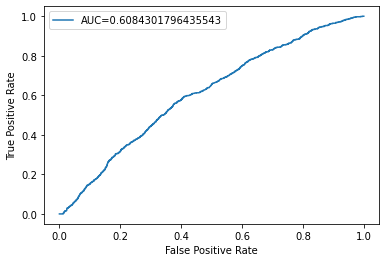

In [19]:
plt.plot(fpr,tpr,label='AUC='+str(auc)) #Roc CURVE
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [20]:
#MSE fav calc
sse = sum([x**2 for x in  y_test-y_pred])
sse/len(y_test)

0.07332561750710666

In [21]:
from sklearn.calibration import calibration_curve
calibration_curve(y_test, y_pred, n_bins=3)

(array([0.08008771]), array([0.07927888]))

# **Predicting Loss Prevented:** 
(bad_balance)

In [22]:
# processing data with bad_balance column
processed_data = forStudents.copy()
processed_data['bad'].fillna(processed_data['bad'].median(), inplace=True)
processed_data['bad_balance'].fillna(processed_data[processed_data['bad']==1]['bad_balance'].mean(), inplace=True)
processed_data['vantage3_score'].fillna(processed_data['vantage3_score'].mean(), inplace=True)
processed_data = processed_data[processed_data['bad'] != -1.0]
relevant_input_cols = ['bad_balance','acquisition_type', 'snapshot_type', 'channel', 'vantage3_score', 'bad', 'annual_income']

categorical = ['acquisition_type', 'snapshot_type', 'channel']
processed_data = processed_data[relevant_input_cols]
one_hot = pd.get_dummies(processed_data[categorical])
processed_data = processed_data.drop(categorical,axis = 1)
processed_data = processed_data.join(one_hot)
#processed_data

In [23]:
X_loss = processed_data.loc[:, ~processed_data.columns.isin(['bad_balance'])]
y_loss = processed_data['bad_balance']

In [24]:
from sklearn.model_selection import train_test_split
X_train_loss, X_test_loss, y_train_loss, y_test_loss = train_test_split(X_loss, y_loss, test_size=0.2, random_state = 42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
loss_model = LinearRegression()

In [26]:
loss_model.fit(X_train_loss,y_train_loss)

LinearRegression()

In [27]:
y_pred_loss= loss_model.predict(X_test_loss)
print('Sum of loss Prevented:', y_pred_loss.sum())

Sum of loss Prevented: 1196248.102853034


In [28]:
#MSE fav calc
sse = sum([x**2 for x in  y_test_loss-y_pred_loss])
sse/len(y_test_loss)

69872.93831974492

Make new features, see performance improvement, apply 2 feature selection techniques, see
performance drop when reducing to 10 features

## **Adding new features**

In [29]:
processed_data['annual_income'].sort_values(ascending=False)


23422    500005122
36038    400000440
19825    150000024
13944    100000579
20170     93600959
           ...    
19791           35
27321            1
14522            0
1632             0
4707             0
Name: annual_income, Length: 47882, dtype: int64

<AxesSubplot:>

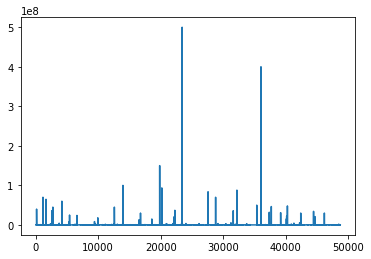

In [30]:
processed_data['annual_income'].plot()

In [31]:
def get_income_bracket(annual_income):

 if annual_income <= 10000:
     return '0-10k'

 elif (annual_income > 10000) & (annual_income <= 30000):
     return '11k-30k'

 elif (annual_income > 30000) & (annual_income <= 60000):
     return '31k-60k'

 elif (annual_income > 60000) & (annual_income <= 100000):
     return '61k-100k'

 elif (annual_income > 100000) & (annual_income <= 200000):
     return '101k-200k'

 elif (annual_income > 200000) & (annual_income <= 300000):
     return '201k-300k'

 elif (annual_income > 300000) & (annual_income <= 1000000):
     return '301k-1M'

 else:
     return '1.1M+'

In [32]:
processed_data['income_bracket'] = processed_data['annual_income'].apply(get_income_bracket)
one_hot_income = pd.get_dummies(processed_data['income_bracket'])
processed_data = processed_data.drop(['income_bracket'],axis = 1)
processed_data = processed_data.join(one_hot_income)
processed_data


,bad_balance,vantage3_score,bad,annual_income,acquisition_type_ORGANIC,acquisition_type_PRESCREENED,snapshot_type_CREDIT_KARMA_LIGHTBOX,snapshot_type_DIRECT_MAIL,snapshot_type_FLOW_MODULARITY,channel_CK_ITA,...,channel_DM,channel_OTHER,0-10k,1.1M+,101k-200k,11k-30k,201k-300k,301k-1M,31k-60k,61k-100k
0,0.0,698.00000,0.0,15171,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,0.0,731.00000,0.0,20000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,0.0,662.03222,0.0,25000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0.0,715.00000,0.0,114779,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0.0,662.03222,0.0,52500,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48707,0.0,732.00000,0.0,25000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
48708,0.0,705.00000,0.0,60897,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
48709,0.0,722.00000,0.0,55000,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
48710,0.0,662.03222,0.0,18000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [33]:
X = processed_data.loc[:, ~processed_data.columns.isin(['bad'])]
y = processed_data['bad']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_loss, X_test_loss, y_train_loss, y_test_loss = train_test_split(X_loss, y_loss, test_size=0.30, random_state = 42)
model = LogisticRegression(C=1, class_weight={0.0:0.92, 1.0:0.08})
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
auc = metrics.roc_auc_score(y_test, pred)
auc # auc went down from 0.6 to 0.5, indicating adding the features might have had an adverse effect

0.5

# **Applying two feature selection techniques**

In [36]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [37]:
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

# **Feature selection using mutual information algorithm**

In [41]:
selector = SelectKBest(mutual_info_classif, k=10)
X_reduced = selector.fit_transform(X, y)
X_reduced

array([[0.0000000e+00, 6.9800000e+02, 1.5171000e+04, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.3100000e+02, 2.0000000e+04, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.6203222e+02, 2.5000000e+04, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 7.2200000e+02, 5.5000000e+04, ..., 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 6.6203222e+02, 1.8000000e+04, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.3400000e+02, 3.5000000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [42]:
X_reduced.shape

(47882, 10)

In [43]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['bad_balance',
 'vantage3_score',
 'annual_income',
 'acquisition_type_ORGANIC',
 'snapshot_type_CREDIT_KARMA_LIGHTBOX',
 'snapshot_type_FLOW_MODULARITY',
 'channel_CK_ITA',
 'channel_CK_LB',
 'channel_OTHER',
 '31k-60k']

In [44]:
X = processed_data[selected_columns]
y = processed_data['bad']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
model = LogisticRegression(C=1, class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred


array([0., 0., 0., ..., 1., 0., 1.])

In [46]:
auc = metrics.roc_auc_score(y_test, pred)
auc

0.9764981925513216

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [48]:
label_encoder = LabelEncoder()
for col in X.columns:
 X[col] = label_encoder.fit_transform(X[col])
X

,bad_balance,vantage3_score,annual_income,acquisition_type_ORGANIC,snapshot_type_CREDIT_KARMA_LIGHTBOX,snapshot_type_FLOW_MODULARITY,channel_CK_ITA,channel_CK_LB,channel_OTHER,31k-60k
0,0,235,511,1,0,1,0,0,1,0
1,0,268,761,1,0,1,0,0,1,0
2,0,199,1041,1,0,1,0,0,1,0
3,0,252,3586,1,0,1,0,0,1,0
4,0,199,2443,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
48707,0,269,1041,1,0,1,0,0,1,0
48708,0,242,2736,1,0,1,0,0,1,0
48709,0,259,2528,1,0,1,0,0,1,1
48710,0,199,658,1,0,1,0,0,1,0


In [49]:
chi_scores = chi2(X,y)
chi_scores


(array([5.76477237e+07, 2.67067965e+03, 5.43867389e+03, 1.93307580e+01,
        4.66664461e+02, 1.93307580e+01, 1.27700816e+02, 4.66664461e+02,
        2.28941364e+02, 2.23683199e+01]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.09921342e-005,
        1.70455847e-103, 1.09921342e-005, 1.30504867e-029, 1.70455847e-103,
        1.01441504e-051, 2.25055923e-006]))

In [50]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

(<AxesSubplot:>,
 Index(['bad_balance', 'vantage3_score', 'annual_income',
        'acquisition_type_ORGANIC', 'snapshot_type_CREDIT_KARMA_LIGHTBOX',
        'snapshot_type_FLOW_MODULARITY', 'channel_CK_ITA', 'channel_CK_LB',
        'channel_OTHER', '31k-60k'],
       dtype='object'))

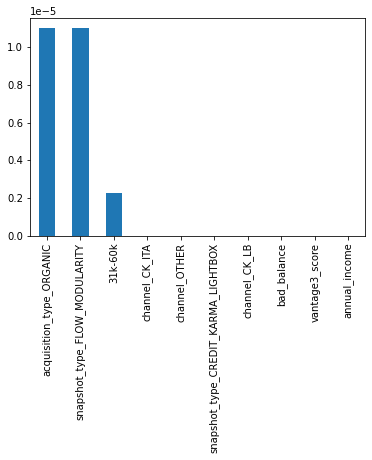

In [51]:
p_values.plot.bar(),X.columns

## Using all features

In [68]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [69]:
data = pd.read_pickle('forStudents.pkl')
data = data.dropna(subset = ['all0000','bad'])
data = data[data['bad'] != -1]
y = data['bad']
data = data.drop(['bad'],axis = 1)
le = LabelEncoder()
label = le.fit_transform(data['state_code'])
data['state_code'] = label

In [70]:
ohe = OneHotEncoder()
oneHot = ohe.fit_transform(data.select_dtypes(['object'])).toarray()
feature_names = ohe.get_feature_names(data.select_dtypes(['object']).columns)
data = pd.concat(
    [
        data,
        pd.DataFrame(
            oneHot, 
            index=data.index, 
            columns= feature_names
        )
    ], axis=1
)

In [71]:
numerics = data.select_dtypes(['number'])
numerics

,vintage,is_app_approved,vantage3_score,bad_v2,bad_balance,current_balance,net_spend,annual_income,state_code,all0000,...,rowNumber,acquisition_type_ORGANIC,acquisition_type_PRESCREENED,snapshot_type_CREDIT_KARMA_LIGHTBOX,snapshot_type_DIRECT_MAIL,snapshot_type_FLOW_MODULARITY,channel_CK_ITA,channel_CK_LB,channel_DM,channel_OTHER
0,202108,1,698.0,0.0,0.0,0.00,5.51,15171,6,10.0,...,59486,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,202103,1,731.0,0.0,0.0,30.95,30.95,20000,7,3.0,...,2357,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,202106,1,715.0,0.0,0.0,0.00,0.00,114779,41,37.0,...,104654,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,202103,1,667.0,0.0,0.0,0.00,0.00,36000,46,1.0,...,92100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,202108,1,641.0,0.0,0.0,0.00,0.00,120000,27,16.0,...,103437,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48706,202104,1,644.0,0.0,0.0,0.00,0.00,160000,13,36.0,...,11542,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48707,202105,1,732.0,0.0,0.0,296.83,296.83,25000,47,2.0,...,131881,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48708,202011,1,705.0,0.0,0.0,0.00,0.00,60897,13,11.0,...,47197,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48709,202104,1,722.0,0.0,0.0,0.00,0.00,55000,28,31.0,...,29739,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [72]:
imp = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imp.fit(numerics)
X = imp.transform(numerics)
X

array([[2.02108e+05, 1.00000e+00, 6.98000e+02, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.02103e+05, 1.00000e+00, 7.31000e+02, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.02106e+05, 1.00000e+00, 7.15000e+02, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.02011e+05, 1.00000e+00, 7.05000e+02, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.02104e+05, 1.00000e+00, 7.22000e+02, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.02105e+05, 1.00000e+00, 6.34000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LogisticRegression(C=1, class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([0., 0., 0., ..., 1., 0., 1.])

In [53]:
pred.sum()


1318.0

In [74]:
auc = metrics.roc_auc_score(y_test, pred)
auc 

0.9507652794180308

In [98]:
bins = np.histogram(y,bins = 10)[1]
y_discrete = np.digitize(y,bins)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size = 0.2,random_state = 0)

In [100]:
from sklearn.ensemble import RandomForestClassifier as rfc
model = rfc(max_depth = 8).fit(X_train,y_train)

In [101]:
pred = model.predict(X_test)

In [102]:
auc = metrics.roc_auc_score(y_test, pred)
auc 

0.8838797814207651

In [118]:
cross_val_score(model, X, y_discrete, cv=3)

array([0.99612184, 0.96171203, 0.95409674])

In [119]:
from sklearn.ensemble import RandomForestClassifier as rfc
model = rfc(max_depth = 10).fit(X_train,y_train)
cross_val_score(model, X, y_discrete, cv=3)

array([0.99908335, 0.99873079, 0.99682696])